# **Solar Energy Forcasting**

https://www.kaggle.com/datasets/stucom/solar-energy-power-generation-dataset/data


By Maria Pinto





## *Structure of Dataset*
The dataset retrieved from Kaggle, titled "Solar Energy Power Generation Dataset," consists of 21 variables that capture various environmental, atmospheric, and operational factors relevant to solar power generation. This dataset is suitable for exploring the correlations between weather conditions and photovoltaic (PV) power output, providing a foundation for predictive analysis and optimization in solar energy production.

Dataset Summary:

*  Rows: 4,213 observations, each representing a unique timestamp or instance of collected environmental data.
*  Data Types: Mostly numeric variables, covering continuous meteorological and solar energy parameters essential for solar power output analysis.

This dataset enables detailed examination of the relationship between environmental factors and solar power generation, useful for forecasting, grid management, and energy market analysis.

## *New Variables*
In addition to the original variables in the solar energy dataset, several interaction features have been created to enrich the analysis and capture essential environmental factors that may impact solar power generation:

*  temp_humidity_index: This variable is an approximation of the combined effect of temperature and humidity, offering an indicator of perceived warmth. This index allows us to study how perceived warmth, affected by both temperature and humidity, may influence solar power generation efficiency.

*  effective_solar_radiation: This variable provides an estimate of solar radiation adjusted for cloud cover, which is essential in assessing the effective solar energy available at the surface. By accounting for cloud cover, this feature helps in analyzing the actual solar radiation that reaches the solar panels, offering a more accurate measure of potential power generation.

*  total_cloud_cover: This variable represents the aggregate cloud cover by averaging three cloud cover layers: high, medium, and low. 
This aggregate measure provides a holistic view of the cloud cover across different atmospheric layers, enhancing the accuracy of solar radiation assessments and its impact on power generation.

These newly created variables add valuable interaction and aggregation features to the dataset, allowing for more comprehensive modeling and forecasting of solar power output under varying environmental conditions.


# 1) Data Cleaning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('spg.csv')
df

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060


In [4]:
df.dtypes

temperature_2_m_above_gnd            float64
relative_humidity_2_m_above_gnd        int64
mean_sea_level_pressure_MSL          float64
total_precipitation_sfc              float64
snowfall_amount_sfc                  float64
total_cloud_cover_sfc                float64
high_cloud_cover_high_cld_lay          int64
medium_cloud_cover_mid_cld_lay         int64
low_cloud_cover_low_cld_lay            int64
shortwave_radiation_backwards_sfc    float64
wind_speed_10_m_above_gnd            float64
wind_direction_10_m_above_gnd        float64
wind_speed_80_m_above_gnd            float64
wind_direction_80_m_above_gnd        float64
wind_speed_900_mb                    float64
wind_direction_900_mb                float64
wind_gust_10_m_above_gnd             float64
angle_of_incidence                   float64
zenith                               float64
azimuth                              float64
generated_power_kw                   float64
dtype: object

In [5]:
# Convert int64 columns to float64
df = df.astype({col: 'float64' for col in df.select_dtypes('int64').columns})

# Verify the change
print(df.dtypes)

temperature_2_m_above_gnd            float64
relative_humidity_2_m_above_gnd      float64
mean_sea_level_pressure_MSL          float64
total_precipitation_sfc              float64
snowfall_amount_sfc                  float64
total_cloud_cover_sfc                float64
high_cloud_cover_high_cld_lay        float64
medium_cloud_cover_mid_cld_lay       float64
low_cloud_cover_low_cld_lay          float64
shortwave_radiation_backwards_sfc    float64
wind_speed_10_m_above_gnd            float64
wind_direction_10_m_above_gnd        float64
wind_speed_80_m_above_gnd            float64
wind_direction_80_m_above_gnd        float64
wind_speed_900_mb                    float64
wind_direction_900_mb                float64
wind_gust_10_m_above_gnd             float64
angle_of_incidence                   float64
zenith                               float64
azimuth                              float64
generated_power_kw                   float64
dtype: object


### 1.1) Null values

In [7]:
null_values = df.isnull().sum()
null_values

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

### 1.2) Outliers

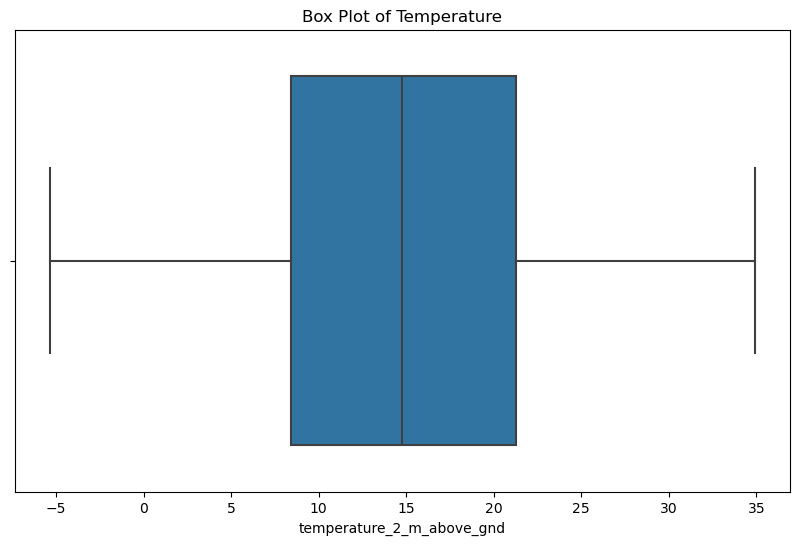

In [9]:
# Box plot for identifying outliers in a particular column (e.g., 'temperature_2_m_above_gnd')
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['temperature_2_m_above_gnd'])
plt.title('Box Plot of Temperature')
plt.show()

In [10]:
# Identifying outliers based on IQR
Q1 = df['temperature_2_m_above_gnd'].quantile(0.25)
Q3 = df['temperature_2_m_above_gnd'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['temperature_2_m_above_gnd'] < (Q1 - 1.5 * IQR)) | 
              (df['temperature_2_m_above_gnd'] > (Q3 + 1.5 * IQR))]


In [11]:
IQR

12.899999999999999

In [12]:
# Removing outliers based on IQR
df = df[~((df['temperature_2_m_above_gnd'] < (Q1 - 1.5 * IQR)) | 
          (df['temperature_2_m_above_gnd'] > (Q3 + 1.5 * IQR)))]

### 1.3)  Identify Inconsistencies

In [14]:
# Checking unique values in a categorical column 
df['wind_direction_10_m_above_gnd'].unique()

# Checking for unrealistic values
inconsistent_data = df[(df['relative_humidity_2_m_above_gnd'] < 0) | 
                       (df['relative_humidity_2_m_above_gnd'] > 100)]


In [15]:
inconsistent_data

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw


In [16]:
# Replacing inconsistent humidity values with median
df.loc[df['relative_humidity_2_m_above_gnd'] < 0, 'relative_humidity_2_m_above_gnd'] = df['relative_humidity_2_m_above_gnd'].median()
df.loc[df['relative_humidity_2_m_above_gnd'] > 100, 'relative_humidity_2_m_above_gnd'] = df['relative_humidity_2_m_above_gnd'].median()


### 1.4) Summary Statistics Post-Cleaning

In [18]:
# Summary statistics
df.describe()


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


# 2) Feature engineering 

### 2.1) Aggregate Cloud Cover Data

In [20]:
# Assuming columns are named as per the screenshot provided
df['total_cloud_cover'] = (
    df['high_cloud_cover_high_cld_lay'] +
    df['medium_cloud_cover_mid_cld_lay'] +
    df['low_cloud_cover_low_cld_lay']
) / 3  # Averaging the three cloud cover layers

In [21]:
df['total_cloud_cover']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
4208    100.0
4209     93.0
4210     91.0
4211     80.0
4212    100.0
Name: total_cloud_cover, Length: 4213, dtype: float64

### 2.2) Temperature-Humidity Index:
An index combining temperature and humidity that could be indicative of perceived warmth.

In [24]:
# Temperature-Humidity Index (Approximation)
df['temp_humidity_index'] = df['temperature_2_m_above_gnd'] * (1 + (df['relative_humidity_2_m_above_gnd'] / 100))


In [25]:
df['temp_humidity_index']

0        2.8427
1        2.9337
2        4.8545
3        7.5660
4        9.8171
         ...   
4208    14.4254
4209    14.3830
4210    13.8130
4211    14.9325
4212    14.4000
Name: temp_humidity_index, Length: 4213, dtype: float64

### 2.3) Solar Radiation-Cloud Cover Interaction: 
This can give an estimate of effective solar radiation considering cloud cover.

In [27]:
# Solar Radiation adjusted by Cloud Cover
df['effective_solar_radiation'] = df['shortwave_radiation_backwards_sfc'] * (1 - df['total_cloud_cover'] / 100)

In [28]:
df['effective_solar_radiation']

0         0.0000
1         1.7800
2       108.5800
3       258.1000
4       375.5800
          ...   
4208      0.0000
4209     14.7028
4210     10.2528
4211     37.3800
4212      0.0000
Name: effective_solar_radiation, Length: 4213, dtype: float64

# 3) Exploratory Data Analysis (EDA)
Visualize relationships between weather conditions (such as cloud cover and solar radiation) and solar power output

###  3.1) Pair Plot for Selected Variables
To explore the pairwise relationships between a few key variables, we can use a pair plot. This is particularly useful for quickly assessing how variables relate to each other visually.

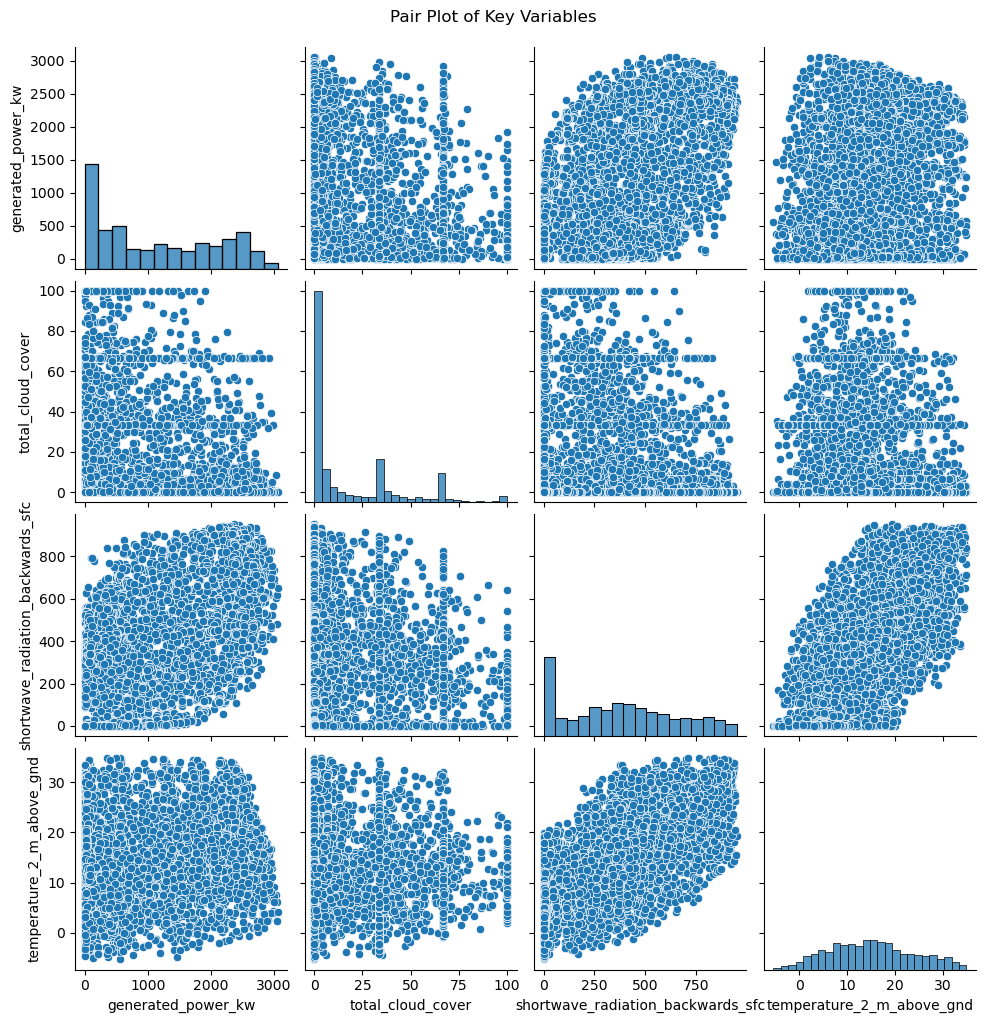

In [31]:
# Pair plot for selected columns
sns.pairplot(df[['generated_power_kw', 'total_cloud_cover', 'shortwave_radiation_backwards_sfc', 'temperature_2_m_above_gnd']])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()


### 3.2) Correlation Heatmap for All Variables
overall view of how different weather variables correlate with solar power output

Correlation with Solar Power Output (generated_power_kw):
generated_power_kw                   1.000000
effective_solar_radiation            0.574508
shortwave_radiation_backwards_sfc    0.556148
temperature_2_m_above_gnd            0.217280
temp_humidity_index                  0.185788
mean_sea_level_pressure_MSL          0.150551
snowfall_amount_sfc                 -0.049508
azimuth                             -0.061184
wind_direction_80_m_above_gnd       -0.069941
wind_direction_10_m_above_gnd       -0.073257
wind_direction_900_mb               -0.077435
wind_speed_10_m_above_gnd           -0.083043
wind_speed_900_mb                   -0.107615
total_precipitation_sfc             -0.118442
wind_gust_10_m_above_gnd            -0.122808
high_cloud_cover_high_cld_lay       -0.147723
wind_speed_80_m_above_gnd           -0.157899
medium_cloud_cover_mid_cld_lay      -0.227834
low_cloud_cover_low_cld_lay         -0.288066
total_cloud_cover                   -0.313545
total_cloud_cover_sfc 

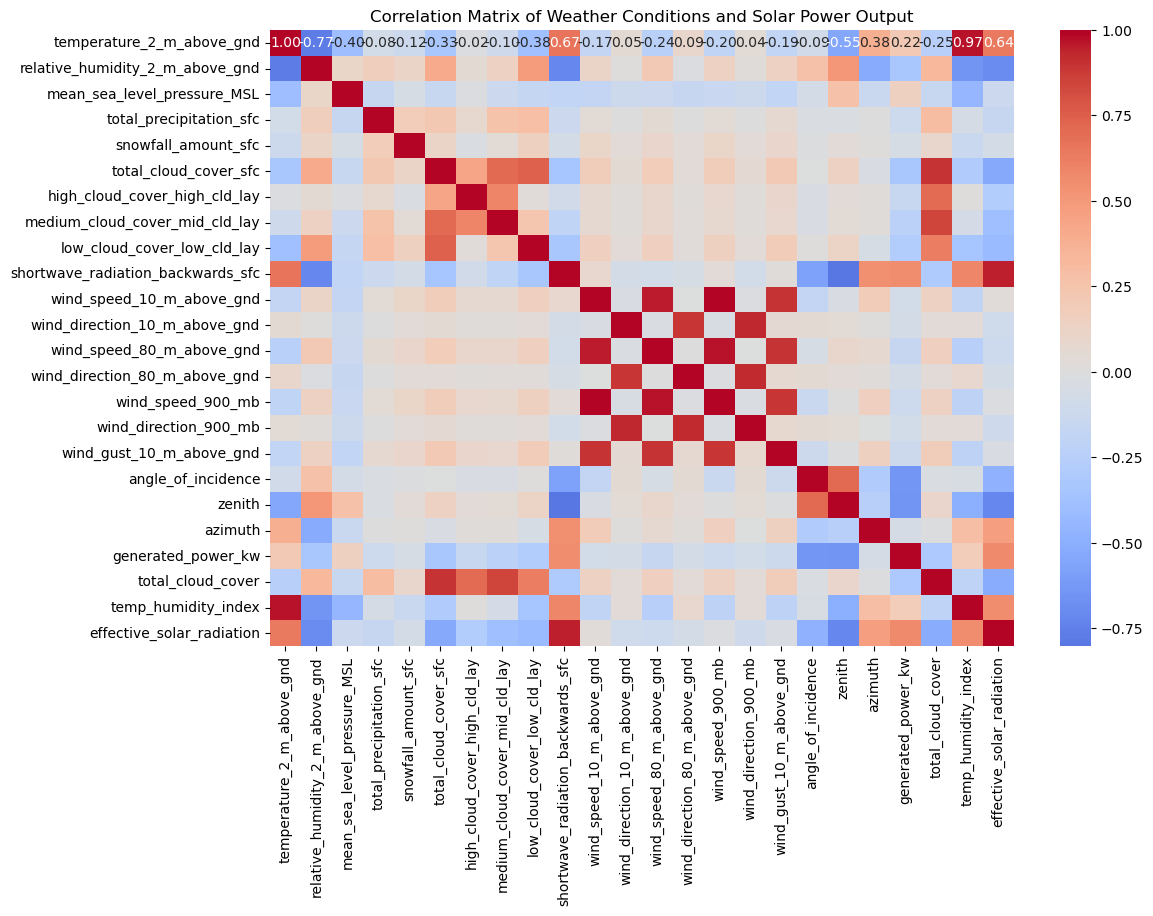

In [33]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation with 'generated_power_kw'
print("Correlation with Solar Power Output (generated_power_kw):")
print(correlation_matrix['generated_power_kw'].sort_values(ascending=False))

# Visualize the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Weather Conditions and Solar Power Output")
plt.show()


### 3.3) Relationship Between Cloud Cover and Solar Power Output

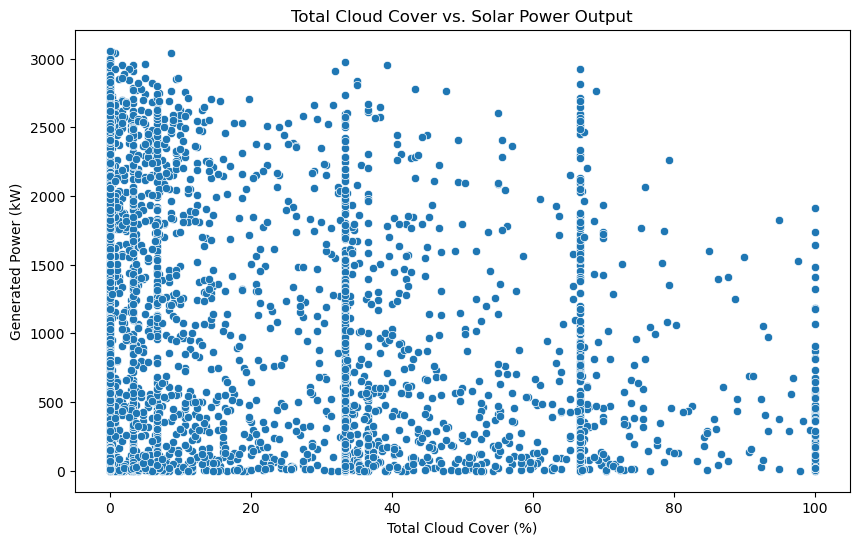

In [35]:
# Scatter plot of total cloud cover vs. solar power output
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_cloud_cover', y='generated_power_kw', data=df)
plt.title('Total Cloud Cover vs. Solar Power Output')
plt.xlabel('Total Cloud Cover (%)')
plt.ylabel('Generated Power (kW)')
plt.show()


### 3.4) Relationship Between Solar Radiation and Solar Power Output

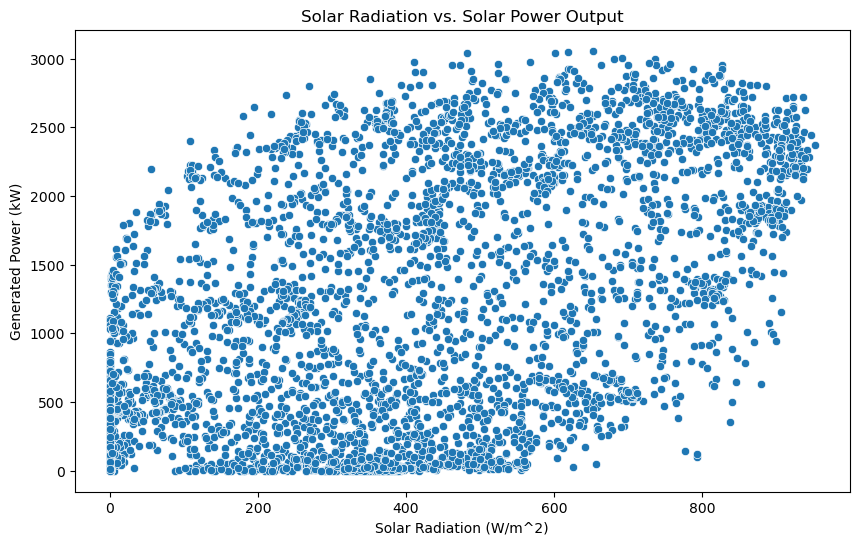

In [37]:
# Scatter plot of solar radiation vs. solar power output
plt.figure(figsize=(10, 6))
sns.scatterplot(x='shortwave_radiation_backwards_sfc', y='generated_power_kw', data=df)
plt.title('Solar Radiation vs. Solar Power Output')
plt.xlabel('Solar Radiation (W/m^2)')
plt.ylabel('Generated Power (kW)')
plt.show()


### 3.5) Distribution Plots for Key Variables

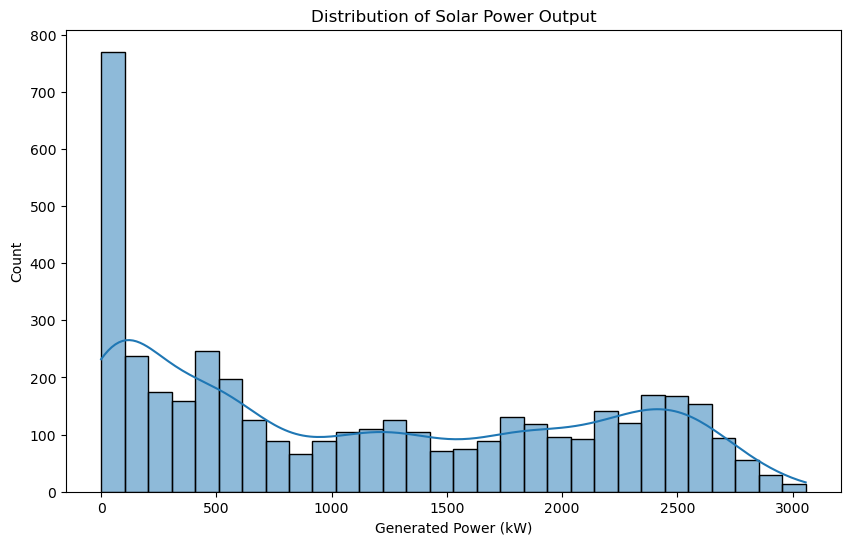

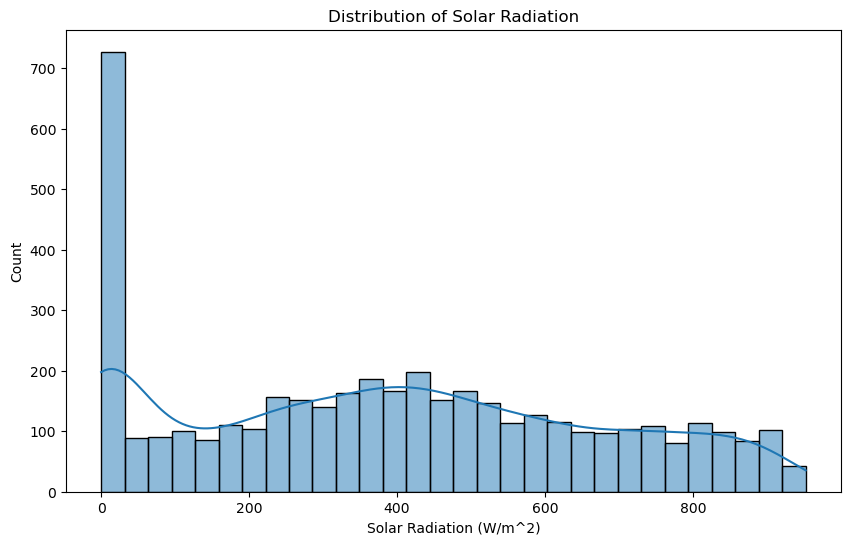

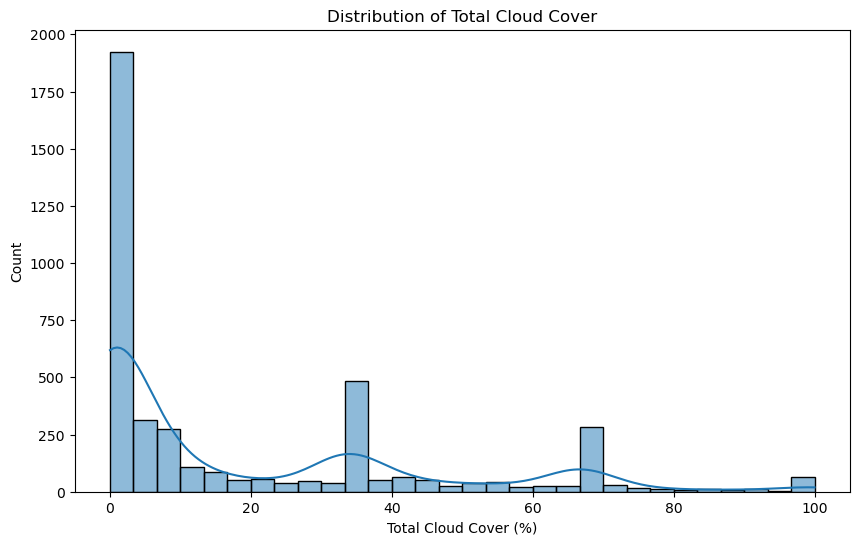

In [39]:
# Distribution of solar power output
plt.figure(figsize=(10, 6))
sns.histplot(df['generated_power_kw'], bins=30, kde=True)
plt.title('Distribution of Solar Power Output')
plt.xlabel('Generated Power (kW)')
plt.show()

# Distribution of solar radiation
plt.figure(figsize=(10, 6))
sns.histplot(df['shortwave_radiation_backwards_sfc'], bins=30, kde=True)
plt.title('Distribution of Solar Radiation')
plt.xlabel('Solar Radiation (W/m^2)')
plt.show()

# Distribution of total cloud cover
plt.figure(figsize=(10, 6))
sns.histplot(df['total_cloud_cover'], bins=30, kde=True)
plt.title('Distribution of Total Cloud Cover')
plt.xlabel('Total Cloud Cover (%)')
plt.show()


### 3.6) Analyze Power Output by Different Cloud Cover Levels

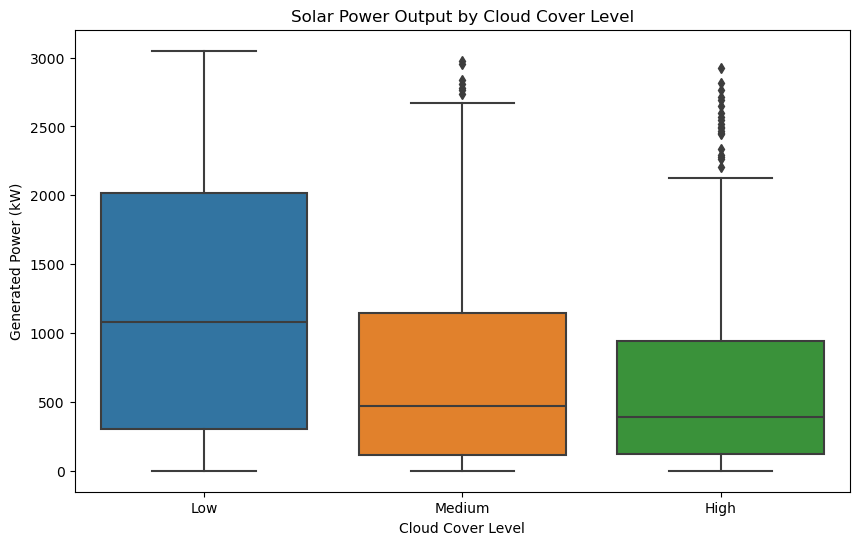

In [41]:
# Categorize total cloud cover into bins
df['cloud_cover_level'] = pd.cut(df['total_cloud_cover'], bins=[0, 33, 66, 100], labels=['Low', 'Medium', 'High'])

# Box plot of power output by cloud cover level
plt.figure(figsize=(10, 6))
sns.boxplot(x='cloud_cover_level', y='generated_power_kw', data=df)
plt.title('Solar Power Output by Cloud Cover Level')
plt.xlabel('Cloud Cover Level')
plt.ylabel('Generated Power (kW)')
plt.show()


# 4) Model Development for Solar Energy Forecasting

* Objective: Develop a predictive model to forecast solar power generation based on environmental conditions. 

Import Libraries:

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [43]:
import xgboost as xgb

### 4.1) Identify and Encode Categorical Variables

In our dataset, cloud cover was represented as categorical values ('Low', 'Medium', 'High'). Since machine learning models require numerical inputs, we applied one-hot encoding to convert these categories into binary columns. This step is crucial in preparing the data for models that cannot directly handle categorical data.

*  Tools Used: pd.get_dummies() from the Pandas library was used with drop_first=True to avoid multicollinearity by dropping one category.
*  Target Variable: The target variable for prediction is generated_power_kw, representing the solar power generated.

This transformation enables the model to incorporate categorical insights effectively, enhancing its ability to generalize across different cloud conditions.

In [45]:
# Use one-hot encoding to convert categorical columns to numeric
df_encoded = pd.get_dummies(df, columns=['cloud_cover_level'], drop_first=True)


We set generated_power_kw as the target variable and use the remaining features for prediction and to evaluate model performance, split the dataset into training and testing sets.

In [46]:
# Defining target and feature set
target = 'generated_power_kw'
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)


### 4.2) Hyperparameter Tuning with Grid Search and Random Search

To optimize model performance, we employed Grid Search for the Random Forest Regressor and Randomized Search for Gradient Boosting and XGBoost models. Hyperparameter tuning is essential in refining model behavior to prevent overfitting or underfitting, especially in complex models.

Random Forest Regressor:

* I defined a grid of parameters, including n_estimators, max_depth, min_samples_split, and min_samples_leaf.
* A Grid Search was performed with cross-validation (cv=3) to evaluate combinations systematically, aiming to minimize Mean Squared Error.

Gradient Boosting and XGBoost:

* For these models, I used Randomized Search to sample from a distribution of hyperparameters, which is more efficient with larger parameter spaces.
* Key parameters tuned include learning_rate, n_estimators, max_depth, and sampling parameters (subsample, colsample_bytree for XGBoost).

This approach ensures that each model operates under optimal settings, improving accuracy and robustness.

#### 4.2.1) Random Forest Hyperparameter Tuning with Grid Search

In [49]:
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [50]:
# Initialize Grid Search for Random Forest
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [51]:
# Get the best parameters and model
rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_
print("Random Forest Best Parameters:", rf_best_params)

Random Forest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


#### 4.2.2) Gradient Boosting Hyperparameter Tuning with Randomized Search

In [53]:
# Define parameter distribution for Gradient Boosting
gb_param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Randomized Search for Gradient Boosting
gb_random_search = RandomizedSearchCV(estimator=gb, param_distributions=gb_param_dist, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=10, random_state=42)
gb_random_search.fit(X_train, y_train)

# Get the best parameters and model
gb_best_params = gb_random_search.best_params_
gb_best_model = gb_random_search.best_estimator_
print("Gradient Boosting Best Parameters:", gb_best_params)


Gradient Boosting Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.05}


#### 4.2.3) XGBoost Hyperparameter Tuning with Randomized Search

In [55]:
# Define parameter distribution for XGBoost
xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize Randomized Search for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_dist, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=10, random_state=42)
xgb_random_search.fit(X_train, y_train)

# Get the best parameters and model
xgb_best_params = xgb_random_search.best_params_
xgb_best_model = xgb_random_search.best_estimator_
print("XGBoost Best Parameters:", xgb_best_params)


XGBoost Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


### 4.3) Model Evaluation

We evaluated the model performance using multiple regression metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). These metrics provide insight into both the accuracy and reliability of the predictions:

* Random Forest: MAE = 254.8, RMSE = 406.8
* Gradient Boosting: MAE = 257.1, RMSE = 398.1
* XGBoost: MAE = 256.5, RMSE = 401.8

Each model was assessed for its ability to minimize error, and the results indicate that Gradient Boosting achieved the best RMSE, showing it could generalize well on unseen data.

In [57]:
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")

# Evaluate Random Forest
print("Random Forest Performance:")
evaluate_model(rf_best_model, X_test, y_test)

# Evaluate Gradient Boosting
print("\nGradient Boosting Performance:")
evaluate_model(gb_best_model, X_test, y_test)

# Evaluate XGBoost
print("\nXGBoost Performance:")
evaluate_model(xgb_best_model, X_test, y_test)


Random Forest Performance:
Mean Absolute Error: 254.811620201891
Mean Squared Error: 165482.9024040788
Root Mean Squared Error: 406.79589772277546

Gradient Boosting Performance:
Mean Absolute Error: 257.14098382443865
Mean Squared Error: 158484.57950909474
Root Mean Squared Error: 398.10121766844014

XGBoost Performance:
Mean Absolute Error: 256.5130401841381
Mean Squared Error: 161456.41337508537
Root Mean Squared Error: 401.81639261618653


# 5)Feature Importance Analysis


To understand which features most influence solar power generation, we performed Feature Importance Analysis on the Random Forest model. This analysis helps in identifying critical factors, which can be insightful for both model interpretation and domain understanding.

Key Influential Features:

* angle_of_incidence: The angle at which sunlight strikes the panel, highly impacting energy absorption.
* zenith and azimuth: Solar positioning factors that are directly tied to the efficiency of solar energy capture.
* total_cloud_cover and effective_solar_radiation: Derived variables that account for overall cloud cover and adjusted solar radiation, showing the impact of weather conditions on solar power output.

This analysis demonstrates a data-driven approach to understanding the primary drivers of solar energy production, validating the feature engineering efforts in the earlier stages.

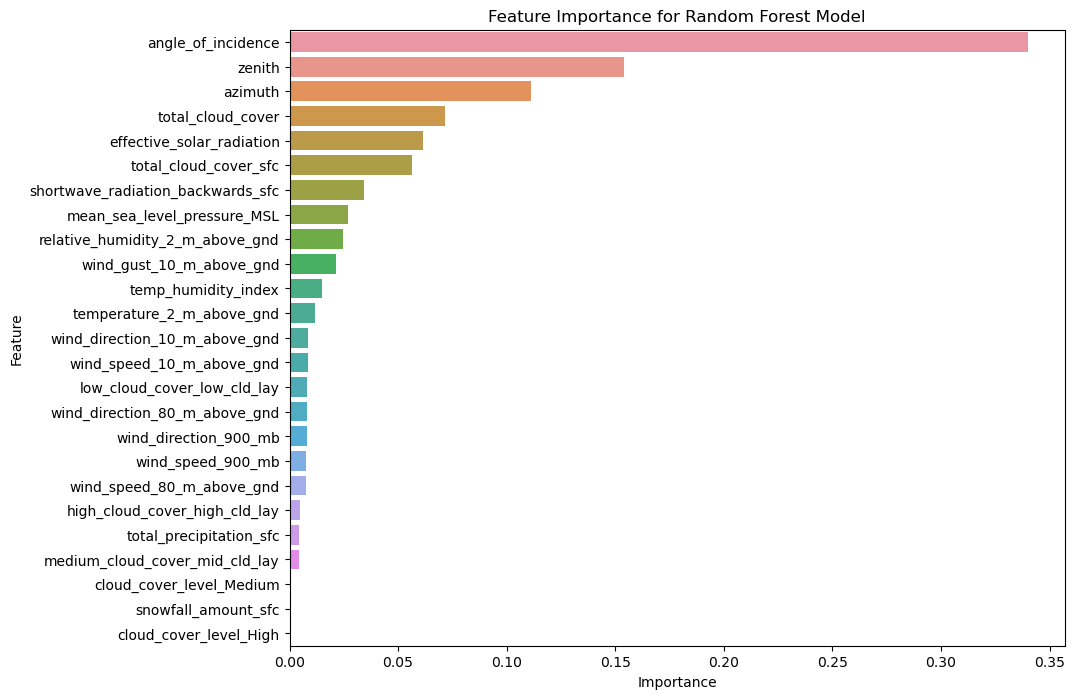

In [59]:
# Feature importance for Random Forest (example)
importances = rf_best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Random Forest Model')
plt.show()


## Summary
Through this project, I demonstrated a comprehensive approach to solving a real-world problem in solar energy forecasting, employing essential machine learning techniques, including data preprocessing, feature engineering, model tuning, and evaluation. My work on hyperparameter tuning and feature importance analysis highlights my ability to fine-tune models for better performance and interpretability.

This structured approach ensures a reliable, interpretable model, offering potential employers a clear example of my problem-solving skills and technical expertise in machine learning.